In [49]:
import h5py
import torch 
import matplotlib.pyplot as plt

In [50]:
with h5py.File('/home/adam/ENR_Sven/moxie_copy/data/processed/profile_database_v1_psi22.hdf5', 'r') as file:
    # print(file['processed_datasets/PSI22'].keys())
    group = file['processed_datasets/PSI22/density_and_temperature_revised']
    # X_train, y_train = group['train']['X'][:], group['train']['y'][:]
    X_val, y_val = group['train']['X'][:], group['valid']['y'][:]
    # X_test, y_test = group['test']['X'][:], group['test']['y'][:]
    
X_val_both, y_val_both = torch.from_numpy(X_val), torch.from_numpy(y_val)

with h5py.File('/home/adam/ENR_Sven/moxie_copy/data/processed/profile_database_v1_psi22.hdf5', 'r') as file:
    # print(file['processed_datasets/PSI22'].keys())
    group = file['processed_datasets/PSI22/density_revised']
    # X_train, y_train = group['train']['X'][:], group['train']['y'][:]
    X_val, y_val = group['train']['X'][:], group['valid']['y'][:]
    # X_test, y_test = group['test']['X'][:], group['test']['y'][:]
    
X_val, y_val = torch.from_numpy(X_val), torch.from_numpy(y_val)

In [51]:

X_new_both, y_new_both = torch.clone(X_val_both), torch.clone(y_val_both)
X_new, y_new = torch.clone(X_val), torch.clone(y_val)

# X_new_both = torch.cat([X_new_both[0:j], X_new_both[j+1:]])

In [52]:
# Code from profile_dataset, and eventually whhat is given to model

max_X = torch.max(X_val)

X_val_norm,  y_val_norm = ( X_val /  max_X),  y_val


max_N = torch.max(X_val_both[:, 0])
max_T = torch.max(X_val_both[:, 1])


X_new_both[:, 0] = (X_val_both[:, 0] /  max_N)
X_new_both[:, 1] = (X_val_both[:, 1] /  max_T)


In [7]:
# print((X_new_both >= 0.8).nonzero(as_tuple=True))
# print(len((X_new_both >= 0.8).nonzero(as_tuple=True)[0]))


(tensor([  356,   356,   357,  ..., 59464, 59464, 59464]), tensor([0, 0, 0,  ..., 0, 0, 0]), tensor([ 6, 21, 28,  ..., 14, 16, 17]))
4054


In [45]:
print(torch.max(X_new_both[:, 1:, :], 0))
j = 14340
T = torch.cat([X_new_both[0:j], X_new_both[j+1:]])
print(torch.max(T[:, 1:, :], 0))

torch.return_types.max(
values=tensor([[0.4953, 0.5728, 0.4924, 0.5140, 0.5440, 0.5094, 0.5825, 0.5681, 0.4639,
         0.5262, 0.5223, 0.5379, 0.4725, 0.4565, 0.4616, 0.4679, 0.4446, 0.4167,
         0.3959, 0.3783, 0.4038, 0.3808, 0.4234, 0.3628, 0.5066, 0.5961, 0.3504,
         0.3765, 0.3611, 0.3260, 0.3290, 0.3414, 0.3185, 0.3091, 0.2400, 0.2145,
         0.2053, 0.2099, 0.1859, 0.1930, 0.2125, 0.2187, 0.2575, 0.2084, 0.1763,
         0.3638, 0.2248, 0.1806, 0.2541, 0.1815, 0.3042, 0.2783, 0.3580, 0.3241,
         0.8285, 0.7173, 0.8082, 0.6290, 1.0000, 0.8458, 0.8720, 0.9498, 0.9933]]),
indices=tensor([[ 3016,  3284, 56426, 56426,  3016, 55983, 56027, 56027, 56027,  2915,
          2817,  2915, 56029, 56029,  2817,  3321,  3370, 56030, 56030, 45683,
          3507,  2796,  3379,  2822, 42767, 42778,  3365,  3366,  2792,  1548,
          1548,  1551,  1575,  3385,  2884, 45680, 56033, 45687,  2793,  2728,
          1734, 56880,  1704,  3281,  2897,  1689,  1689,  1708, 36944,  15

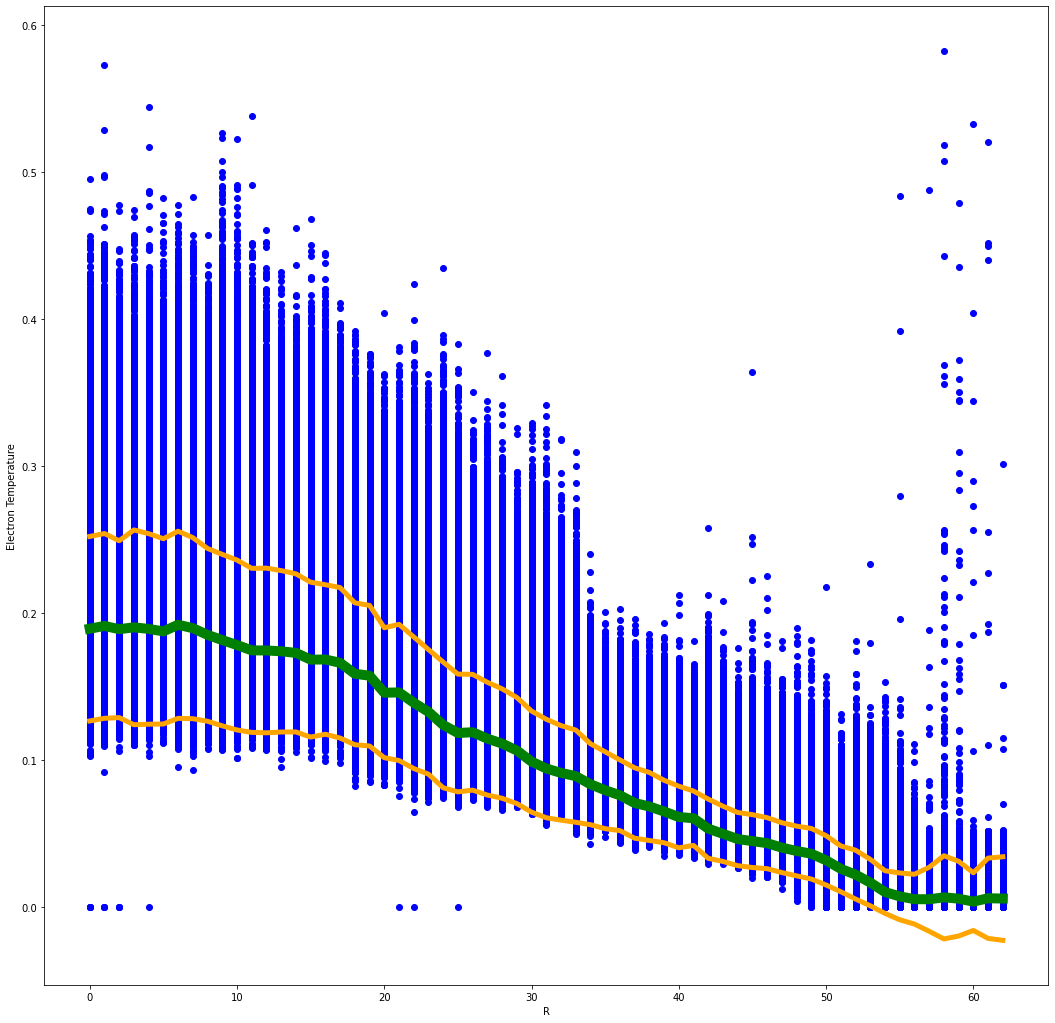

In [53]:
plt.close()
mean = torch.mean(X_new_both[:, 1:, :], 0)[0]
std = torch.std(X_new_both[:, 1:, :], 0)[0]
fig = plt.figure(figsize=(18, 18))
for j in range(5000):
    plt.scatter([i for i in range(63)],X_new_both[j, 1, :], c='blue')
    # plt.plot(X_new_both[i, 1, :])
plt.plot(torch.mean(X_new_both[:, 1:, :], 0)[0], lw=10,c='green')
plt.plot(mean + std, lw=5, c='orange')
# plt.plot(2*mean + std, lw=5, c='red')
plt.plot(mean - std, lw=5, c='orange')
# plt.plot(mean + 4*std, lw=5, c='green')
# plt.plot(mean - 4*std, lw=5, c='green')
plt.xlabel('R')
plt.ylabel('Electron Temperature')
plt.show()

tensor(1917.5547)
tensor([[3627.7119, 3664.6987, 3621.7524, 3645.9517, 3628.2014, 3593.0903,
         3679.8250, 3634.8340, 3549.0034, 3478.9268, 3414.5503, 3345.1782,
         3345.2310, 3332.8413, 3313.8203, 3224.0996, 3226.4546, 3182.4729,
         3038.5757, 3016.5435, 2793.3359, 2797.8625, 2664.2012, 2544.5374,
         2373.2266, 2269.8506, 2278.1211, 2194.8823, 2131.1782, 2041.6086,
         1895.1437, 1805.9803, 1748.7377, 1706.1072, 1600.7788, 1522.1345,
         1456.5573, 1355.8455, 1310.4700, 1244.7134, 1173.7174, 1157.2332,
         1019.9065,  953.8992,  886.0108,  859.0802,  832.4210,  774.0734,
          731.5479,  696.2914,  609.9141,  501.2930,  429.5163,  328.9131,
          202.7837,  155.2567,  139.3320,  166.1346,  219.6930,  185.9946,
          110.3863,  186.6020,  186.7531]])


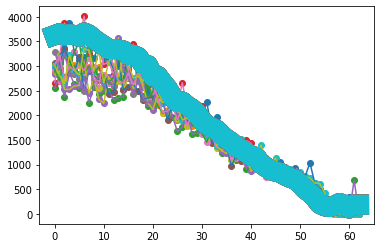

In [55]:
plt.close()
fig = plt.figure()
print(X_val_both[:, 1:, :].mean())
print(torch.mean(X_val_both[:, 1:, :], 0))
for i in range(10):
    plt.scatter([i for i in range(63)],X_val_both[i, 1, :])
    plt.plot(X_val_both[i, 1, :])
    plt.plot(torch.mean(X_val_both[:, 1:, :], 0)[0], lw=20)
    
plt.show()

What is currently done to both:

tensor([[6.4666e+19, 6.7557e+19, 6.5418e+19,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [6.7352e+19, 6.4244e+19, 6.4969e+19,  ..., 0.0000e+00, 2.3455e+18,
         0.0000e+00],
        [6.6505e+19, 6.4749e+19, 6.5053e+19,  ..., 6.8645e+18, 4.6468e+18,
         2.6808e+18],
        ...,
        [1.1162e+20, 1.1679e+20, 1.1305e+20,  ..., 9.4056e-21, 3.5046e+18,
         1.1375e+18],
        [1.0764e+20, 1.1400e+20, 1.1012e+20,  ..., 9.4056e-21, 9.4056e-21,
         1.1511e+18],
        [1.1133e+20, 1.1243e+20, 1.1575e+20,  ..., 9.4056e-21, 9.4056e-21,
         9.4056e-21]])


In [57]:
# Show how to query only density and or temperature but keep shape

In [85]:
X_val_both = torch.clone(X_new_both)

torch.return_types.max(
values=tensor([[0.2814, 0.3132, 0.2625, 0.2740, 0.2900, 0.2932, 0.3105, 0.3028, 0.2632,
         0.3007, 0.2784, 0.2660, 0.2519, 0.2512, 0.2461, 0.2494, 0.2479, 0.2288,
         0.2110, 0.2017, 0.1983, 0.2037, 0.4067, 0.1934, 0.3859, 0.5045, 0.1856,
         0.2038, 0.1925, 0.1738, 0.1754, 0.1820, 0.1698, 0.1598, 0.1280, 0.1129,
         0.1095, 0.1119, 0.0974, 0.1029, 0.1133, 0.1166, 0.1373, 0.1111, 0.0894,
         0.1940, 0.1198, 0.2199, 0.5215, 0.4423, 0.3576, 0.4867, 0.5182, 0.5279,
         0.5212, 0.5296, 0.5266, 0.5279, 0.7502, 1.0000, 0.5234, 0.5287, 0.5295]]),
indices=tensor([[ 2801,  2776, 56425, 56425,  3020,  3390, 56030, 56030,  3390,  3379,
          2793,  3390, 56039,  2827,  2793,  3368,  3371,  2861, 56038,  2654,
          3367,  2810,  1744,  2828, 42747, 42772,  2831,  3355,  2789,  1554,
          1554,  1568,  1572,  1701,  2873, 56427, 56026, 45682, 56425,  2722,
          1727, 56864,  1696,  3312,  3324,  1689,  1689, 38035, 37268, 357

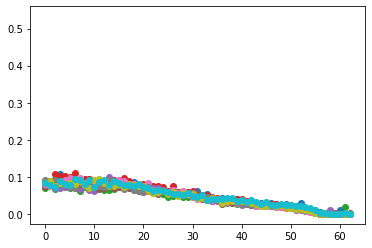

In [89]:
plt.close()
fig = plt.figure()
# print(X_val_both[:, 1:, :].mean())
# print(torch.max(X_new_both[:, 1:, :], 0))
print(torch.max(X_val_both[:, 1:, :], 0))
j = 14340
T = torch.cat([X_val_both[0:j], X_val_both[j+1:]])
print(torch.max(T[:, 1:, :], 0))
"""j = 734
T = torch.cat([T[0:j], T[j+1:]])
print(torch.max(T[:, 1:, :], 0))
j = 734
T = torch.cat([T[0:j], T[j+1:]])
print(torch.max(T[:, 1:, :], 0))"""

for i in range(10):
    plt.scatter([i for i in range(63)],X_val_both[i, 1, :])
    # plt.plot(X_new_both[i, 1, :])
    # plt.plot(torch.mean(X_new_both[:, 1:, :], 0)[0], lw=20)
    # plt.plot(torch.max(X_new_both[:, 1:, :], 0)[0], lw=15)
    # plt.plot(torch.max(X_val_both[:, 1:, :], 0)[0])
    plt.plot(torch.max(T[:, 1:, :], 0)[0])
    
plt.show()